Importing Libraries

In [707]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import streamlit as st
import datetime
from matplotlib.ticker import FuncFormatter

Data Loading and Preprocessing

In [709]:
#Load csv file
df = pd.read_csv('E:/retail/walmart_sales.csv')
df

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,1/1/2012,28774,High,32,...,-111.80,East,4031,180.36,1/2/2012,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,1/1/2012,13729,Not Specified,9,...,-342.91,East,1914,872.48,1/3/2012,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,1/2/2012,37537,Low,4,...,-193.08,West,5272,1239.06,1/2/2012,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,1/2/2012,44069,Critical,43,...,247.79,West,6225,614.80,1/2/2012,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,1/2/2012,37537,Low,43,...,-1049.85,West,5273,4083.19,1/4/2012,Delivery Truck,45.00,California,100.98,94559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.0,Tony Molinari,Corporate,0.10,1,12/30/2015,50950,Not Specified,35,...,-15.07,West,7142,448.10,12/30/2015,Express Air,4.51,California,13.48,94533
8395,Harker Heights,95.0,Matt Hagelstein,Home Office,0.09,1,12/30/2015,25542,Low,37,...,-18.66,Central,3583,257.46,12/30/2015,Express Air,4.23,Texas,7.28,76543
8396,Riverview,95.0,Theresa Swint,Consumer,0.10,1,12/30/2015,45127,Medium,10,...,-1.29,South,6361,14.15,12/30/2015,Regular Air,0.70,Florida,1.48,33569
8397,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.09,1,12/30/2015,49344,Low,1,...,-745.20,South,6916,803.33,12/30/2015,Regular Air,24.49,Kentucky,832.81,40356


In [710]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,1/1/2012,28774,High,32,...,-111.80,East,4031,180.36,1/2/2012,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,1/1/2012,13729,Not Specified,9,...,-342.91,East,1914,872.48,1/3/2012,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,1/2/2012,37537,Low,4,...,-193.08,West,5272,1239.06,1/2/2012,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,1/2/2012,44069,Critical,43,...,247.79,West,6225,614.80,1/2/2012,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,1/2/2012,37537,Low,43,...,-1049.85,West,5273,4083.19,1/4/2012,Delivery Truck,45.00,California,100.98,94559


In [711]:
# Display the first few rows of the dataframe
st.write("Walmart Sales Data")
st.write(df.head())

In [712]:
# Check for missing values
missing_values = df.isnull().sum()

Exploratory Data Analysis (EDA)

In [713]:
# Check the shape of the dataset
print("### Shape of the dataset")
print(df.shape)

### Shape of the dataset
(8399, 25)


In [714]:
# Display the first few rows of the dataframe
print("\n### First few rows of the dataset")
print(df.head())


### First few rows of the dataset
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1   1/1/2012     28774           High              32  ...   
1                  1   1/1/2012     13729  Not Specified               9  ...   
2                  1   1/2/2012     37537            Low               4  ...   
3                  1   1/2/2012     44069       Critical              43  ...   
4                  1   1/2/2012     37537            Low              43  ...   

    Profit Regi

In [715]:
# Get basic statistics of numerical columns
print("\n### Basic statistics of numerical columns")
print(df.describe())


### Basic statistics of numerical columns
       Customer Age     Discount  Number of Records      Order ID  \
count   7496.000000  8399.000000             8399.0   8399.000000   
mean      54.542823     0.049671                1.0  29965.179783   
std        9.519435     0.031823                0.0  17260.883447   
min       41.000000     0.000000                1.0      3.000000   
25%       47.000000     0.020000                1.0  15011.500000   
50%       53.000000     0.050000                1.0  29857.000000   
75%       61.000000     0.080000                1.0  44596.000000   
max       95.000000     0.250000                1.0  59973.000000   

       Order Quantity  Product Base Margin        Profit       Row ID  \
count     8399.000000          8336.000000   8399.000000  8399.000000   
mean        25.571735             0.512513    181.184422  4200.000000   
std         14.481071             0.135589   1196.653326  2424.726789   
min          1.000000             0.350000 

In [716]:
# Check for missing values in each column
print("\n### Missing values in each column")
missing_values = df.isnull().sum()
print(missing_values)


### Missing values in each column
City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
dtype: int64


In [717]:
 #Drop the Customer Age column
print("\n### Dropping the Customer Age column")
df = df.drop(columns=['Customer Age'])


### Dropping the Customer Age column


In [718]:
print(f"Data shape after dropping Customer Age column: {df.shape}")

Data shape after dropping Customer Age column: (8399, 24)


In [719]:
# Fill missing Product Base Margin with mean
print("\n### Filling missing Product Base Margin with mean")
df['Product Base Margin'] = df['Product Base Margin'].fillna(df['Product Base Margin'].mean())
print("Missing values in 'Product Base Margin' after filling:")
print(df['Product Base Margin'].isnull().sum())


### Filling missing Product Base Margin with mean
Missing values in 'Product Base Margin' after filling:
0


In [720]:
#Verify no missing values
print("\n### Verifying no missing values")
print(df.isnull().sum())


### Verifying no missing values
City                    0
Customer Name           0
Customer Segment        0
Discount                0
Number of Records       0
Order Date              0
Order ID                0
Order Priority          0
Order Quantity          0
Product Base Margin     0
Product Category        0
Product Container       0
Product Name            0
Product Sub-Category    0
Profit                  0
Region                  0
Row ID                  0
Sales                   0
Ship Date               0
Ship Mode               0
Shipping Cost           0
State                   0
Unit Price              0
Zip Code                0
dtype: int64


Category-Based Analysis

In [721]:
# Group by Product Category and sum the Sales
sales_by_category = df.groupby('Product Category')['Sales'].sum().sort_values()

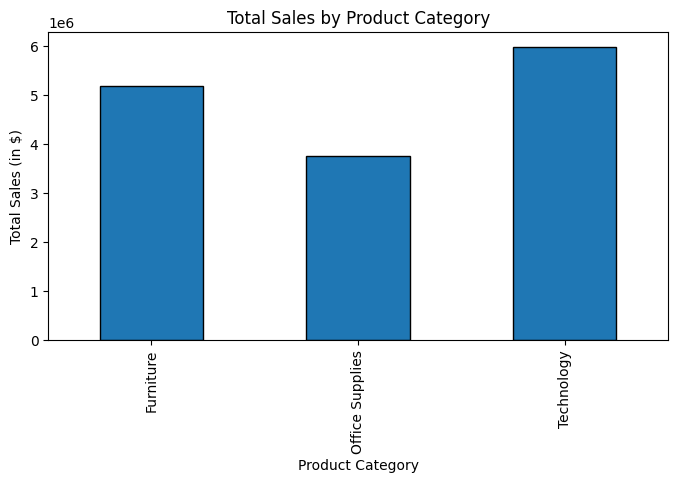

In [722]:
# Distribution of sales across different product categories
plt.figure(figsize=(8, 4))
df.groupby('Product Category')['Sales'].sum().plot(kind='bar', edgecolor='black')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (in $)')

# Show plot
plt.show()
plt.show()

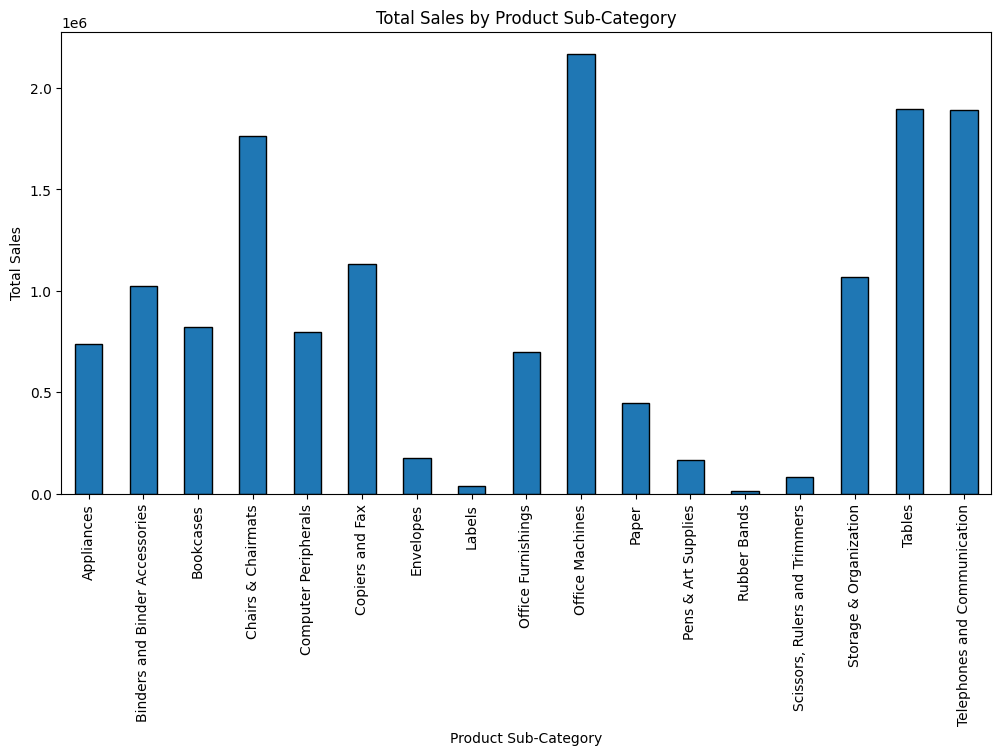

In [723]:
# Distribution of sales across different product subcategories
plt.figure(figsize=(12, 6))
df.groupby('Product Sub-Category')['Sales'].sum().plot(kind='bar', edgecolor='black')
plt.title('Total Sales by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.show()

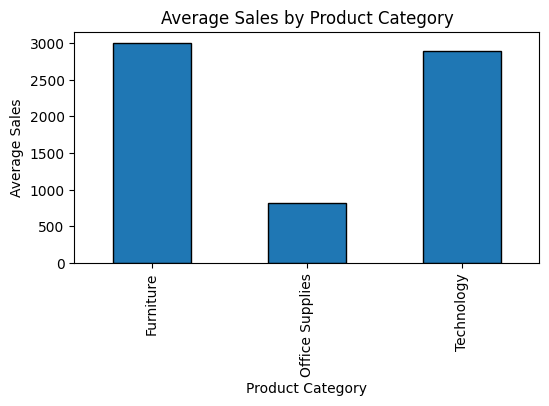

In [724]:
# Average sales per category
plt.figure(figsize=(6,3))
df.groupby('Product Category')['Sales'].mean().plot(kind='bar', edgecolor='black')
plt.title('Average Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.show()

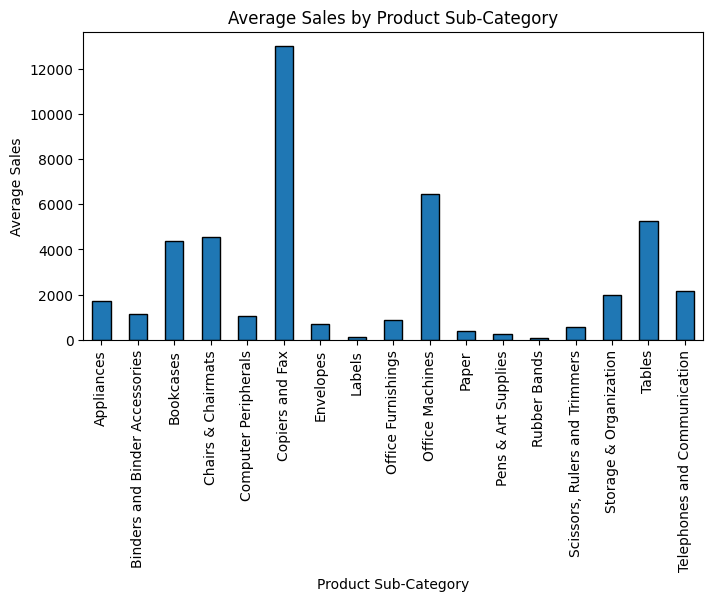

In [725]:
# Average sales per subcategory
plt.figure(figsize=(8,4))
df.groupby('Product Sub-Category')['Sales'].mean().plot(kind='bar', edgecolor='black')
plt.title('Average Sales by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Average Sales')
plt.show()

Time series analysis

In [726]:
# Extract year and month from the order date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

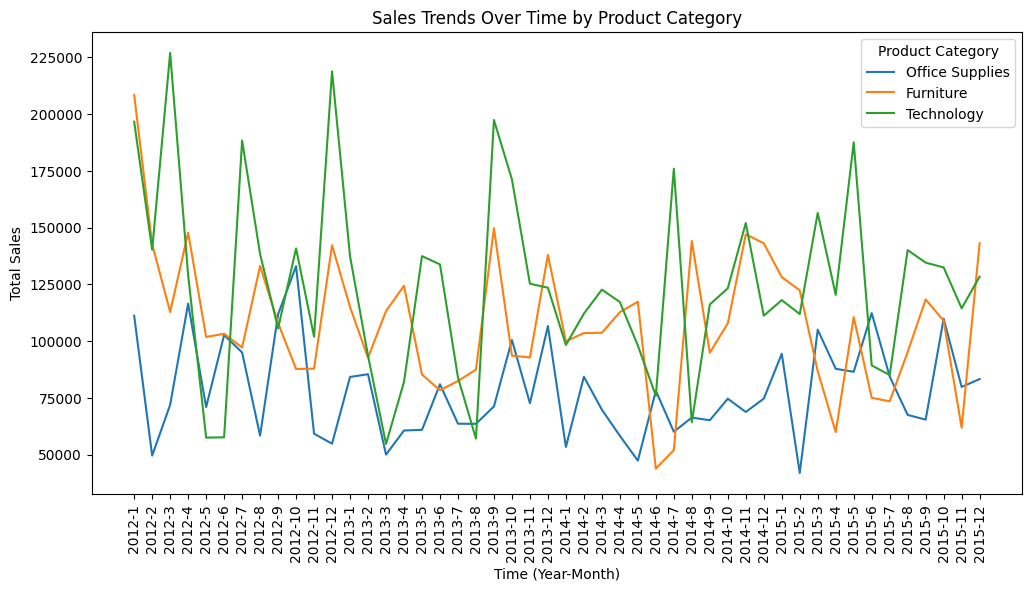

In [727]:
# Sales trends over time for each category
plt.figure(figsize=(12, 6))
for category in df['Product Category'].unique():
    category_sales = df[df['Product Category'] == category].groupby(['Year', 'Month'])['Sales'].sum().reset_index()
    plt.plot(category_sales['Year'].astype(str) + '-' + category_sales['Month'].astype(str), category_sales['Sales'], label=category)

plt.title('Sales Trends Over Time by Product Category')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.xticks(rotation=90)
plt.show()

In [728]:
# Grouping by Year, Month, and Product Sub-Category and summing the Sales
sales_by_subcategory = df.groupby(['Year', 'Month', 'Product Sub-Category'])['Sales'].sum().reset_index()

# Selecting only the top N subcategories with the highest sales
top_n_subcategories = sales_by_subcategory.groupby('Product Sub-Category')['Sales'].sum().nlargest(5).index
sales_by_subcategory_top_n = sales_by_subcategory[sales_by_subcategory['Product Sub-Category'].isin(top_n_subcategories)]


In [729]:
# Pivot table for easy plotting
pivot_sales = sales_by_subcategory_top_n.pivot_table(index=['Year', 'Month'], columns='Product Sub-Category', values='Sales', aggfunc='sum')

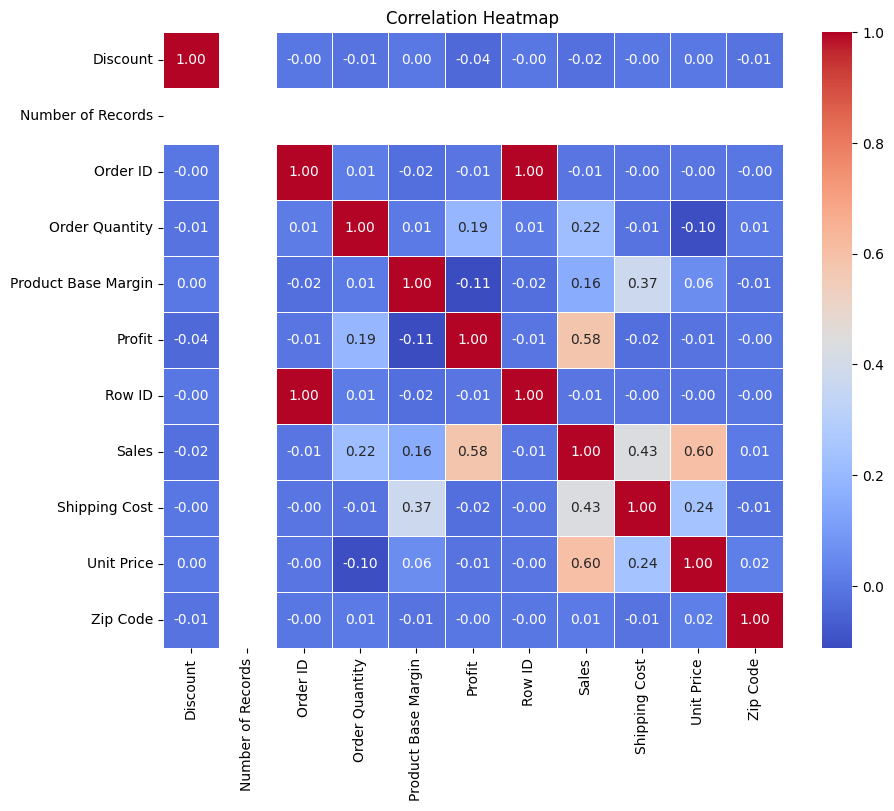

In [730]:
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9716\856075804.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date')['Profit'].resample('M').sum().plot()


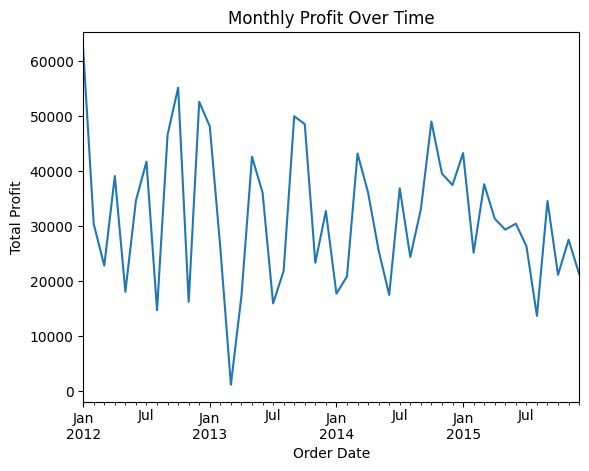

In [731]:
#Trend over time
df.set_index('Order Date')['Profit'].resample('M').sum().plot()
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Over Time')
plt.show()

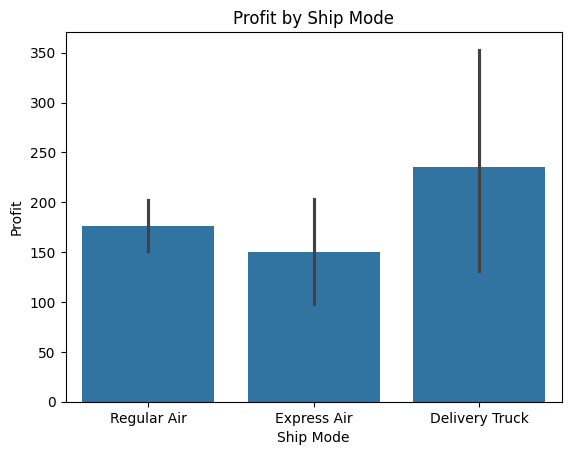

In [732]:
#Bar plots for categorical variables.
sns.barplot(x='Ship Mode', y='Profit', data=df)
plt.title('Profit by Ship Mode')
plt.show()

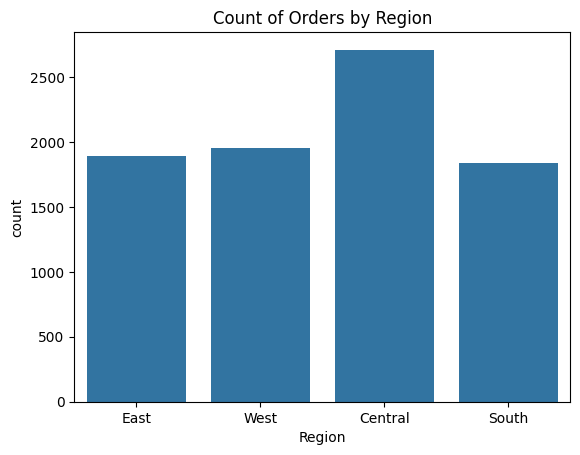

In [733]:
sns.countplot(x='Region', data=df)
plt.title('Count of Orders by Region')
plt.show()

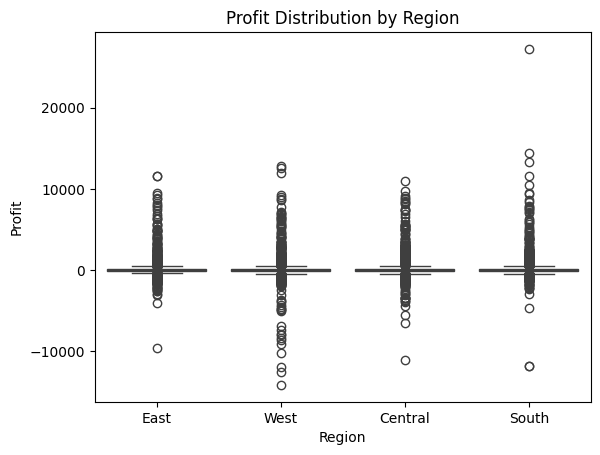

In [734]:
#Grouped box plots to compare distributions across categories.
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Profit Distribution by Region')
plt.show()

In [735]:

#Data Featuring
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract day of the week, month, and quarter
df['Day_of_week'] = df['Order Date'].dt.dayofweek
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter

In [736]:
# Total sales per product category
category_sales = df.groupby('Product Category')['Sales'].sum().reset_index()
category_sales.columns = ['Product Category', 'Total Sales_Category']
df = pd.merge(df, category_sales, on='Product Category')

# Total sales per product sub-category
subcategory_sales = df.groupby('Product Sub-Category')['Sales'].sum().reset_index()
subcategory_sales.columns = ['Product Sub-Category', 'Total Sales_Subcategory']
df = pd.merge(df, subcategory_sales, on='Product Sub-Category')

In [737]:
# Interaction feature: Discount multiplied by Sales
df['Discount_Sales'] = df['Discount'] * df['Sales']

In [738]:
# Rolling mean of sales for the past 7 days
df['Rolling_mean_7d'] = df['Sales'].rolling(window=7).mean()

In [739]:
print(df.columns)

Index(['City', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code', 'Year', 'Month', 'Day_of_week',
       'Quarter', 'Total Sales_Category', 'Total Sales_Subcategory',
       'Discount_Sales', 'Rolling_mean_7d'],
      dtype='object')


In [740]:
# One-hot encoding 
#df = pd.get_dummies(df, columns=['City', 'Order Priority', 'Product Category', 'Product Container', 'Product Sub-Category', 'Region', 'Ship Mode', 'State'], drop_first=True)

Data Model

In [741]:
# Encode categorical variables
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

label_encoder = LabelEncoder()
df['Product Category'] = label_encoder.fit_transform(df['Product Category'])
df['Product Container'] = label_encoder.fit_transform(df['Product Container'])
df['Product Name'] = label_encoder.fit_transform(df['Product Name'])
df['Product Sub-Category'] = label_encoder.fit_transform(df['Product Sub-Category'])

In [742]:

# Split data into features (X) and target (y)
# X = df.drop('Sales', axis=1)
# y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [743]:
print(X_train.shape)
print(len(y_train))


(6719, 3577)
6719


In [744]:
print(df.isnull().sum())


City                       0
Customer Name              0
Customer Segment           0
Discount                   0
Number of Records          0
Order Date                 0
Order ID                   0
Order Priority             0
Order Quantity             0
Product Base Margin        0
Product Category           0
Product Container          0
Product Name               0
Product Sub-Category       0
Profit                     0
Region                     0
Row ID                     0
Sales                      0
Ship Date                  0
Ship Mode                  0
Shipping Cost              0
State                      0
Unit Price                 0
Zip Code                   0
Year                       0
Month                      0
Day_of_week                0
Quarter                    0
Total Sales_Category       0
Total Sales_Subcategory    0
Discount_Sales             0
Rolling_mean_7d            6
dtype: int64


In [745]:
print(X_train.dtypes)
print(y_train.dtypes)

Discount                        float64
Number of Records               float64
Order ID                        float64
Order Quantity                  float64
Product Base Margin             float64
                                 ...   
Order Priority_Low                 bool
Order Priority_Medium              bool
Order Priority_Not Specified       bool
Ship Mode_Express Air              bool
Ship Mode_Regular Air              bool
Length: 3577, dtype: object
float64


In [746]:
# df = pd.get_dummies(df, columns=['City'], drop_first=True)

In [747]:
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

In [748]:
print(df.head())

   City      Customer Name Customer Segment  Discount  Number of Records  \
0   749     Jessica Myrick   Small Business      0.10                  1   
1   122     Matt Collister      Home Office      0.08                  1   
2   826  Alan Schoenberger        Corporate      0.00                  1   
3   798  Elizabeth Moffitt         Consumer      0.08                  1   
4   826  Alan Schoenberger        Corporate      0.07                  1   

  Order Date  Order ID Order Priority  Order Quantity  Product Base Margin  \
0 2012-01-01     28774           High              32             0.680000   
1 2012-01-01     13729  Not Specified               9             0.512513   
2 2012-01-02     37537            Low               4             0.560000   
3 2012-01-02     44069       Critical              43             0.390000   
4 2012-01-02     37537            Low              43             0.690000   

   ...  Unit Price  Zip Code  Year  Month  Day_of_week Quarter  \
0  ...  

In [749]:
print(df.isnull().sum())

City                       0
Customer Name              0
Customer Segment           0
Discount                   0
Number of Records          0
Order Date                 0
Order ID                   0
Order Priority             0
Order Quantity             0
Product Base Margin        0
Product Category           0
Product Container          0
Product Name               0
Product Sub-Category       0
Profit                     0
Region                     0
Row ID                     0
Sales                      0
Ship Date                  0
Ship Mode                  0
Shipping Cost              0
State                      0
Unit Price                 0
Zip Code                   0
Year                       0
Month                      0
Day_of_week                0
Quarter                    0
Total Sales_Category       0
Total Sales_Subcategory    0
Discount_Sales             0
Rolling_mean_7d            6
dtype: int64


In [750]:
categorical_columns = [
    'City', 'Customer Name', 'Customer Segment', 'Product Category', 
    'Product Container', 'Product Name', 'Product Sub-Category', 
    'Region', 'State', 'Order Priority', 'Ship Mode'
]

In [751]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [752]:
# Exclude target variable and date columns from numerical columns
numerical_columns = [col for col in numerical_columns if col not in ['Sales', 'Order Date', 'Ship Date']]

In [753]:
# Fill missing values for numerical columns with the mean
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

In [754]:
# Fill missing values for categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [755]:
# Verify there are no more missing values
print(df.isnull().sum())

City                       0
Customer Name              0
Customer Segment           0
Discount                   0
Number of Records          0
Order Date                 0
Order ID                   0
Order Priority             0
Order Quantity             0
Product Base Margin        0
Product Category           0
Product Container          0
Product Name               0
Product Sub-Category       0
Profit                     0
Region                     0
Row ID                     0
Sales                      0
Ship Date                  0
Ship Mode                  0
Shipping Cost              0
State                      0
Unit Price                 0
Zip Code                   0
Year                       0
Month                      0
Day_of_week                0
Quarter                    0
Total Sales_Category       0
Total Sales_Subcategory    0
Discount_Sales             0
Rolling_mean_7d            0
dtype: int64


In [756]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [757]:
print(df_encoded.head())
print(df_encoded.columns)

   Discount  Number of Records Order Date  Order ID  Order Quantity  \
0      0.10                1.0 2012-01-01   28774.0            32.0   
1      0.08                1.0 2012-01-01   13729.0             9.0   
2      0.00                1.0 2012-01-02   37537.0             4.0   
3      0.08                1.0 2012-01-02   44069.0            43.0   
4      0.07                1.0 2012-01-02   37537.0            43.0   

   Product Base Margin   Profit  Row ID    Sales Ship Date  ...  \
0             0.680000  -111.80  4031.0   180.36  1/2/2012  ...   
1             0.512513  -342.91  1914.0   872.48  1/3/2012  ...   
2             0.560000  -193.08  5272.0  1239.06  1/2/2012  ...   
3             0.390000   247.79  6225.0   614.80  1/2/2012  ...   
4             0.690000 -1049.85  5273.0  4083.19  1/4/2012  ...   

   State_Washington  State_West Virginia  State_Wisconsin  State_Wyoming  \
0             False                False            False          False   
1             Fals

In [758]:
X = df_encoded.drop(columns=['Sales', 'Order Date', 'Ship Date'])  # Exclude target variable and date columns
y = df_encoded['Sales']

In [759]:
print(X.shape, y.shape)

(8399, 3577) (8399,)


In [760]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [761]:
# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6719, 3577) (1680, 3577) (6719,) (1680,)


In [762]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train Linear Regression model
lr_model = LinearRegression()


In [763]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [764]:
# Make predictions
lr_predictions = lr_model.predict(X_test)

In [765]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = lr_mse ** 0.5
lr_mae = mean_absolute_error(y_test, lr_predictions)

In [766]:
print("Linear Regression Performance:")
print(f"Mean Squared Error: {lr_mse}")
print(f"Root Mean Squared Error: {lr_rmse}")
print(f"Mean Absolute Error: {lr_mae}")

Linear Regression Performance:
Mean Squared Error: 2815017.6077557676
Root Mean Squared Error: 1677.8014208349473
Mean Absolute Error: 1002.9631709123277


In [767]:
#Predict Sales Values and Compare with Actual Values
# Adding a column for the predicted sales in the test set
X_test['Predicted_Sales'] = lr_predictions
X_test['Actual_Sales'] = y_test.values

# Display the first few rows of the test set with actual and predicted sales
print(X_test[['Predicted_Sales', 'Actual_Sales']].head())

      Predicted_Sales  Actual_Sales
33         148.379095        700.73
5281     -1028.397549         61.50
4912      2046.698234        325.80
3298      7591.274104       6366.52
4756     -1277.228079         13.71


In [768]:
#Aggregate Sales by Category
# Assuming 'Product Category' is one of the encoded columns
category_columns = [col for col in X_test.columns if 'Product Category_' in col]

# Aggregate actual and predicted sales by category
category_sales = X_test.groupby(category_columns).agg({
    'Predicted_Sales': 'sum',
    'Actual_Sales': 'sum'
}).reset_index()

# Display the aggregated sales by category
print(category_sales)

   Product Category_1  Product Category_2  Predicted_Sales  Actual_Sales
0               False               False     9.118980e+05  1.025952e+06
1               False                True     1.165964e+06  1.199990e+06
2                True               False     8.040538e+05  8.146301e+05


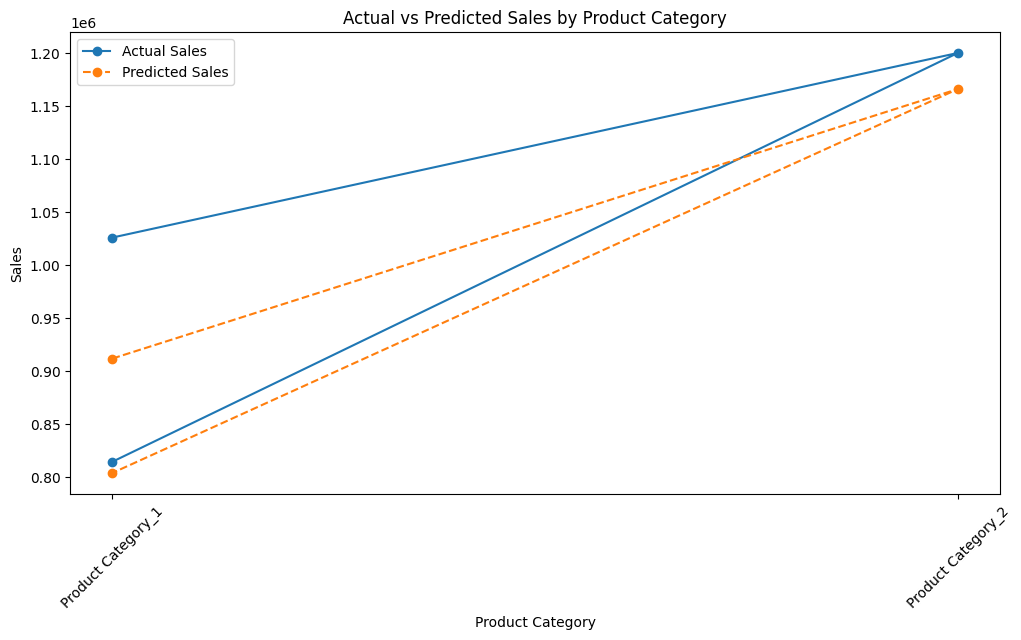

In [769]:
plt.figure(figsize=(12, 6))

# Plot actual sales
plt.plot(category_labels, category_sales['Actual_Sales'], marker='o', linestyle='-', label='Actual Sales')

# Plot predicted sales
plt.plot(category_labels, category_sales['Predicted_Sales'], marker='o', linestyle='--', label='Predicted Sales')

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales by Product Category')
plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_9716\817250.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


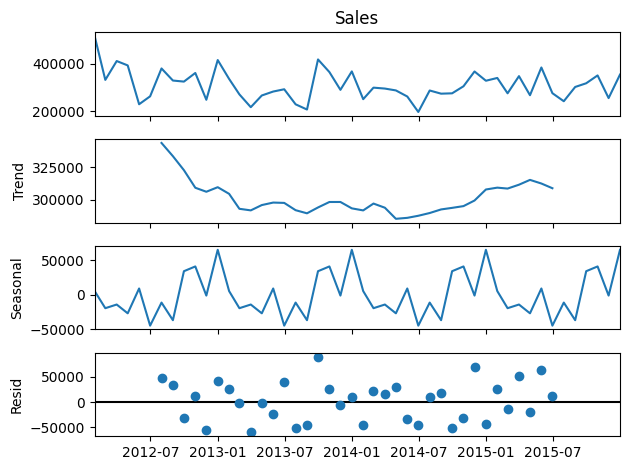

In [770]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set the index to 'Order Date'
df.set_index('Order Date', inplace=True)

# Resample the data to monthly sales
monthly_sales = df['Sales'].resample('M').sum()

# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


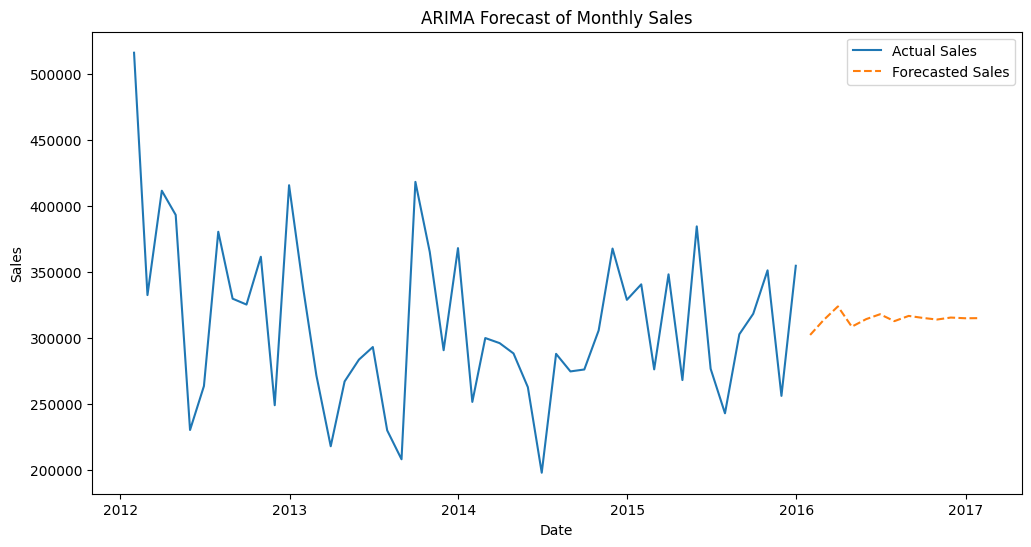

2016-01-31    302235.825878
2016-02-29    313495.355111
2016-03-31    323882.087121
2016-04-30    308504.701849
2016-05-31    314224.699810
2016-06-30    317945.093342
2016-07-31    312705.486608
2016-08-31    316675.676746
2016-09-30    315177.066064
2016-10-31    313926.391018
2016-11-30    315434.313967
2016-12-31    314900.197094
2017-01-31    314986.127365
Freq: ME, Name: predicted_mean, dtype: float64


In [771]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(monthly_sales, order=(5, 1, 0))
arima_result = arima_model.fit()

# Predict future sales
arima_forecast = arima_result.predict(start=len(monthly_sales), end=len(monthly_sales) + 12, typ='levels')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(arima_forecast, label='Forecasted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Forecast of Monthly Sales')
plt.legend()
plt.show()
print(arima_forecast)


C:\Users\Acer\AppData\Local\Temp\ipykernel_9716\1434085091.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(category_labels, rotation=45)


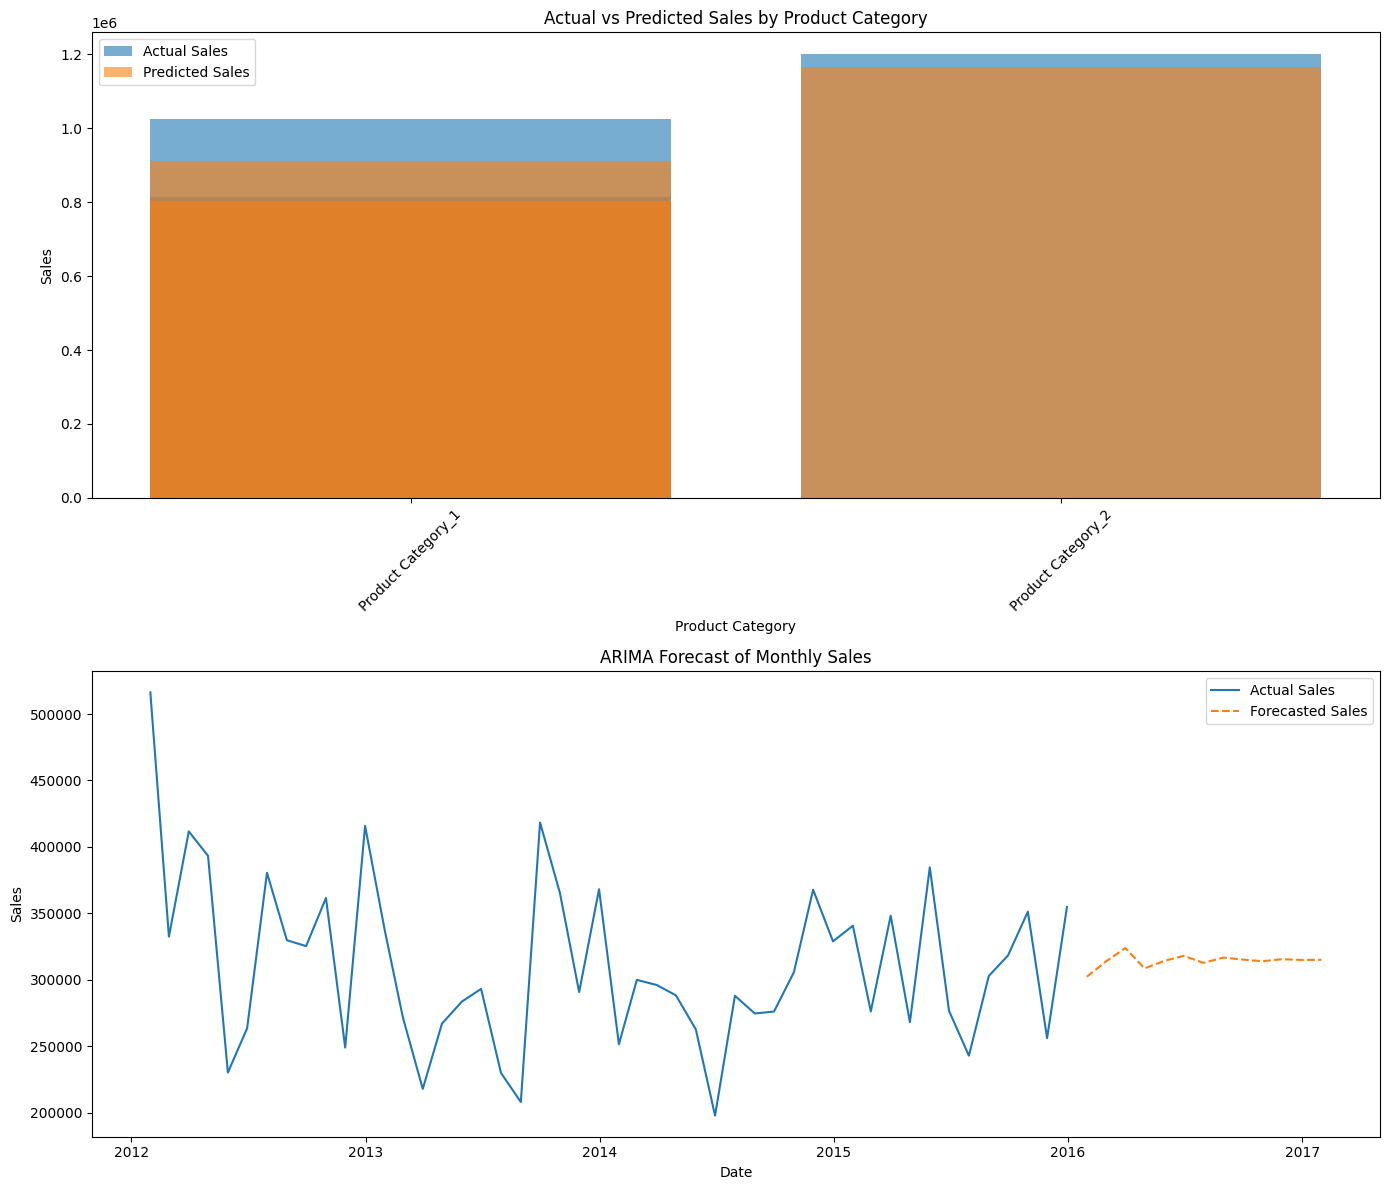

In [772]:
# Plot actual vs predicted sales by category and time series together
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot 1: Actual vs Predicted Sales by Category
category_labels = category_sales[category_columns].idxmax(axis=1)
axes[0].bar(category_labels, category_sales['Actual_Sales'], alpha=0.6, label='Actual Sales')
axes[0].bar(category_labels, category_sales['Predicted_Sales'], alpha=0.6, label='Predicted Sales')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Sales')
axes[0].set_title('Actual vs Predicted Sales by Product Category')
axes[0].legend()
axes[0].set_xticklabels(category_labels, rotation=45)

# Plot 2: Time Series Forecast
axes[1].plot(monthly_sales, label='Actual Sales')
axes[1].plot(arima_forecast, label='Forecasted Sales', linestyle='--')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sales')
axes[1].set_title('ARIMA Forecast of Monthly Sales')
axes[1].legend()

plt.tight_layout()
plt.show()

In [773]:
# # Print the predicted values
# print("Predicted Sales:")
# print(lr_predictions)

In [774]:
category_columns = ['Product Category', 'Product Subcategory']
numerical_columns = ['Year', 'Month', 'Day_of_week', 'Quarter']  